Spiking Neural Network World Representation Output Analysis Notebook
===========================================================

Welcome, dear AI nerd. Here you will find the plotting of the results from the Spiking Neural Network I am working on. Optimally, the plot generated by plot_data should equate to that of the path followed during training. As I move forward, I will document the progress from a scientific stand point.

Instead of bombarding the README.md file, this notebook will be used for the pourposes of work tracking. Please make sure to have installed the neccesary libraries. There is a note on README.md talking about this.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [32]:
array = List[float]

def plot_data(x: array = [], y: array = [])->None:
    x_data = np.array(x)
    y_data = np.array(y)

    pd.DataFrame([x_data, y_data]).transpose().plot.scatter(x=0, y=1)
    plt.show()

January 8th, 2021

Results from previous project
-------------------------------------------

After setting up and rerunning the code, The results were similar such that no learning seems to happen. I suspect that this is due to inconsistency in code, so i will restructure the code so tht even after the end of this study, the code used to build a SNN can be freely accessible as a framework for future work.

As expected, limited learning happened at the corner of (0, 0).

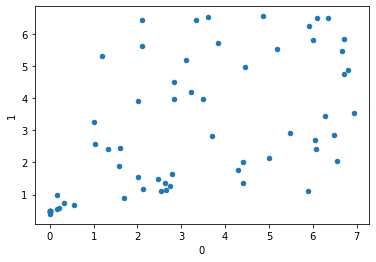

In [35]:
x_tmp = [ 5.12259e-57, 7.83501e-32, 2.12556e-07, 0.330273, 1.5845, 5.17771, 1.60797, 6.80139, 3.09313e-30, 1.00441e-18, 7.05256e-06, 0.158704, 2.12241, 3.70433, 2.47244, 1.0407, 3.98883e-06, 8.02284e-05, 0.00225265, 0.204624, 3.23089, 6.4775, 2.78258, 2.82564, 1.70305, 0.158301, 0.540798, 1.31644, 2.01008, 6.69906, 2.53886, 3.84483, 2.0991, 5.46876, 4.3982, 2.65031, 4.99893, 1.00597, 3.10659, 6.35106, 3.59832, 6.56046, 2.74138, 5.89925, 3.49831, 4.29427, 6.04229, 6.70215, 2.00169, 6.94204, 2.6289, 6.2666, 6.67513, 4.41685, 2.09548, 6.09945, 4.44611, 6.07899, 3.33199, 5.99799, 5.90773, 4.87234, 2.84288, 1.18898, ]
y_tmp = [ 0.4, 0.469043, 0.498775, 0.751798, 1.88703, 5.52432, 2.45704, 4.86785, 0.469043, 0.489846, 0.49955, 0.551715, 1.18181, 2.83071, 1.4911, 2.57603, 0.498777, 0.499565, 0.483598, 0.592211, 4.19131, 2.84853, 1.63148, 3.98616, 0.891249, 0.984506, 0.664563, 2.42974, 1.53737, 4.74364, 1.11669, 5.6974, 5.62083, 2.91426, 1.36391, 1.14273, 2.128, 3.25084, 5.19269, 6.49126, 6.51436, 2.03384, 1.25649, 1.10257, 3.96098, 1.77284, 2.69073, 5.8321, 3.89606, 3.535, 1.36465, 3.43501, 5.47738, 1.99827, 6.42277, 6.49833, 4.9631, 2.407, 6.42638, 5.80025, 6.23412, 6.54353, 4.49772, 5.3054, ]

plot_data(x_tmp, y_tmp)

Original Map before learning.

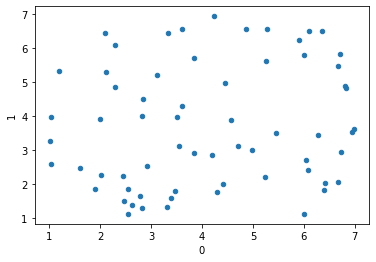

In [34]:
start_a = [ 2.29295, 2.45252, 5.44759, 3.55642, 2.02429, 5.2586, 1.60867, 6.80143, 2.10455, 3.60381, 4.56977, 3.46958, 3.38788, 3.83501, 2.47497, 1.04071, 4.19041, 4.7063, 1.90326, 2.92897, 5.26789, 6.73028, 2.78578, 2.82568, 6.42355, 1.02922, 4.98354, 4.23257, 2.55191, 6.82872, 2.54033, 3.84486, 2.28124, 6.98792, 6.40128, 3.30553, 5.24652, 1.00995, 3.10696, 6.35107, 3.61376, 6.67672, 2.82066, 6.00164, 3.51174, 4.29562, 6.04235, 6.70215, 2.00192, 6.94562, 2.63112, 6.26981, 6.67589, 4.4169, 2.09548, 6.09945, 4.44611, 6.07903, 3.33202, 5.99802, 5.90774, 4.87234, 2.84288, 1.18898, ]
start_b = [ 4.86026, 2.24416, 3.49451, 3.10678, 2.25411, 5.60147, 2.45785, 4.86787, 5.27819, 4.27851, 3.86951, 1.78993, 1.57413, 2.91186, 1.49208, 2.57605, 2.85748, 3.1232, 1.84586, 2.53337, 6.54009, 2.94134, 1.63281, 3.98621, 2.02037, 3.96483, 2.98423, 6.92811, 1.83717, 4.82711, 1.11709, 5.69743, 6.07128, 3.6116, 1.80421, 1.32539, 2.21307, 3.26207, 5.19326, 6.49126, 6.54057, 2.06277, 1.28119, 1.1147, 3.97463, 1.77327, 2.69075, 5.8321, 3.89647, 3.53661, 1.36547, 3.43657, 5.47796, 1.99828, 6.42278, 6.49833, 4.96311, 2.40701, 6.42644, 5.80028, 6.23412, 6.54353, 4.49772, 5.3054, ]
plot_data(start_a, start_b)